C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


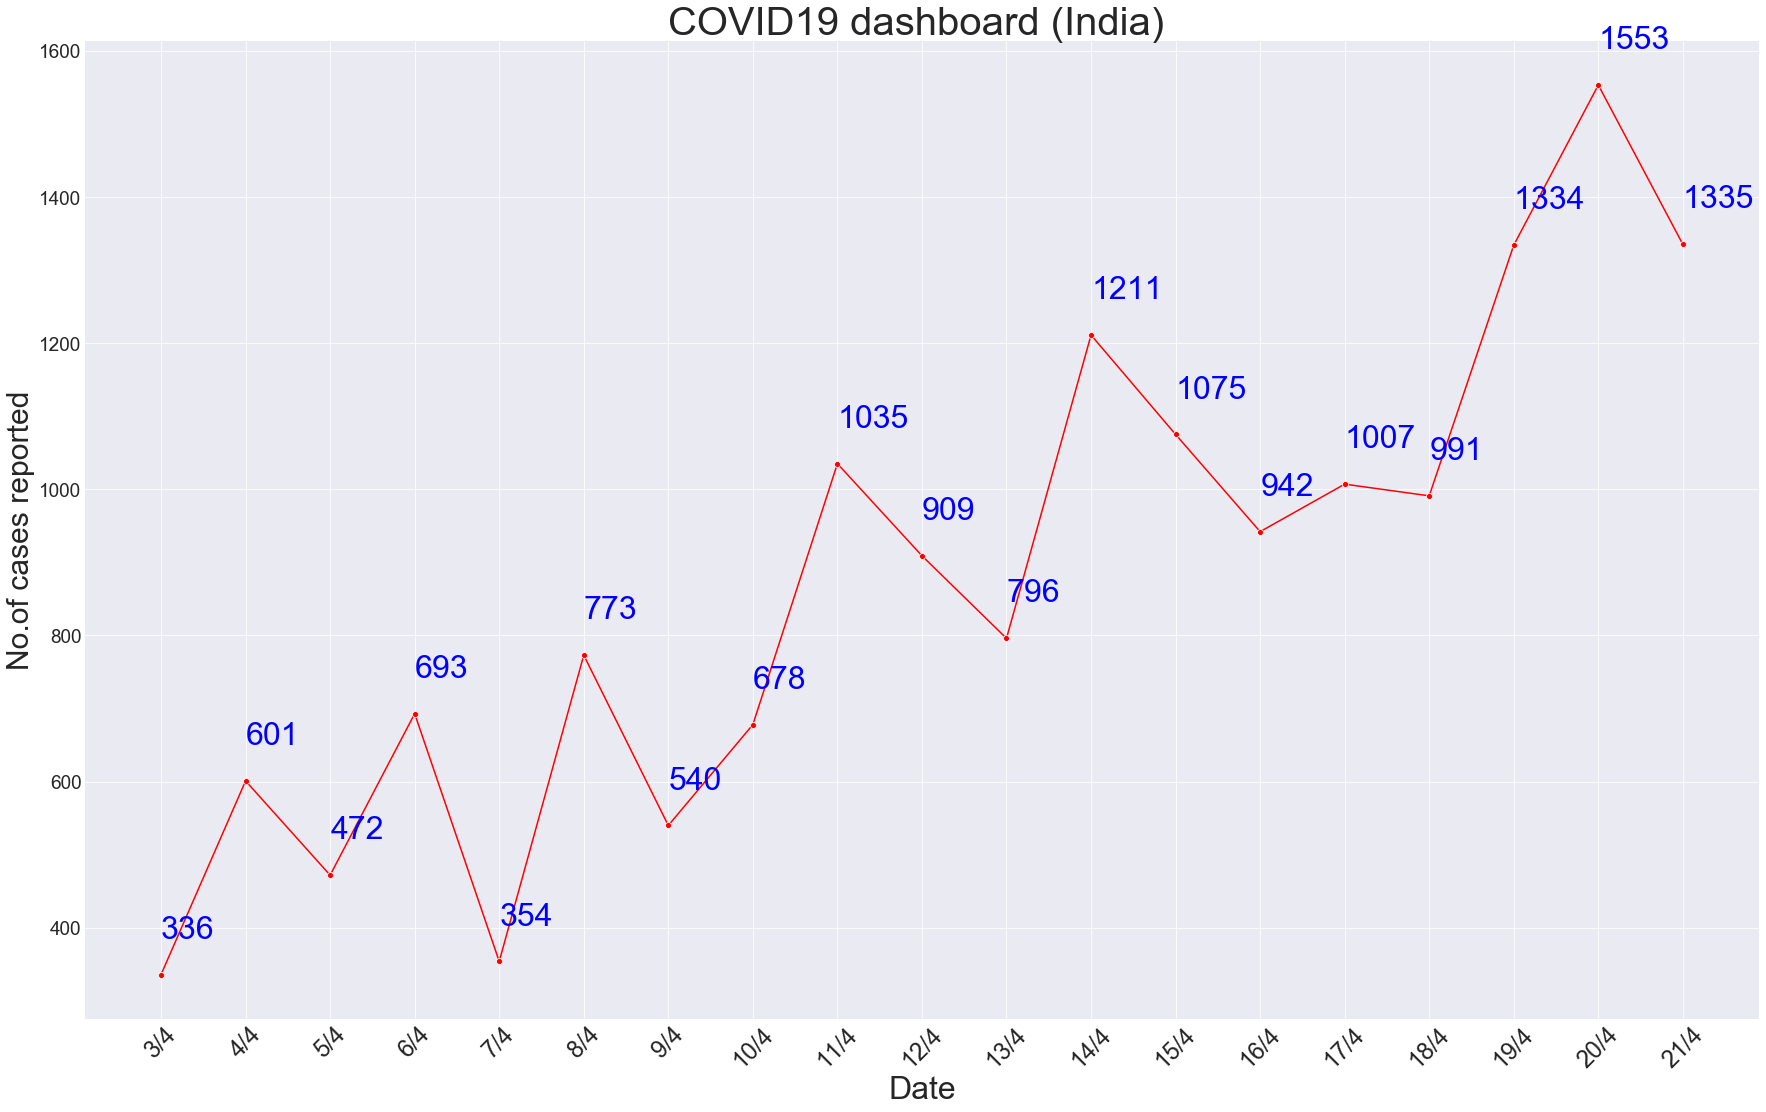

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials p189sm3091360pfp.135 - gsmtp')

In [4]:
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase 
from email import encoders 
from smtplib import SMTP
import smtplib
import sys
import base64
import seaborn as sns
from base64 import b64encode
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import datetime

# ECDC DATASET 

import datetime
import requests
now = datetime.datetime.now()
url1=('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
r=requests.get(url1, allow_redirects=True)
open(r"C:/Users/kmfj819/Desktop/Temp/test_covid1.xlsx", 'wb').write(r.content)
ecdc_df=pd.read_csv(url1, error_bad_lines=False, usecols = lambda column : column not in 
["dateRep","geoId","countryterritoryCode","popData2018"])
ecdc_df.reset_index(drop=True,inplace=True)
ecdc_df.rename(columns={'cases':'newcases','countriesAndTerritories':'country'},inplace=True)
ecdc_df.head()

countries=ecdc_df.groupby('country')
indiadf=countries.get_group("India")
indiadf['Date']=indiadf['day'].astype(str)+"/"+indiadf['month'].astype(str)
indiadf=indiadf.head(20)
indiadf=indiadf[:-1] #dropping the last row in the df
indiadf=indiadf.sort_values(['month','day'])
#indiadf.tail()

cmap = sns.cubehelix_palette(dark=.3, as_cmap=True)
plt.figure(figsize=(30, 18))
plt.style.use('seaborn-darkgrid')
ax=sns.lineplot(x="Date", y="newcases",
                        palette='dark',
                        legend="full",
                        data=indiadf,  
                        marker='o', 
                        color='r',sort=False,sizes=(100,200)
                               )

# Adding annotations to list no of newcases in each data point
[ax.text(p[0], p[1]+50, p[1], color='B', size=32) for p in zip(ax.get_xticks(), indiadf['newcases'])]

        
plt.title("COVID19 dashboard (India) ", fontsize=40); #Corona Pandemic LIVE (India)- Created by SABI
plt.xlabel("Date",fontsize=32);
plt.ylabel("No.of cases reported",fontsize=30);
plt.xticks(size=24,rotation=45)
xticks = ax.get_xticks()
plt.yticks(size=19,rotation=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=1)
plt.setp(ax.get_legend().get_texts(),fontsize=20)

f=io.BytesIO()
plt.savefig(f, format='png')
f.seek(0)
plt.show()

server = smtplib.SMTP('smtp.gmail.com',587)
server.ehlo()
server.starttls()
server.login('xxxxxxxx@gmail.com','xxxxxxxxxxx')

recipients = ['ooooooooooooooooooo@gmail.com'] 
emaillist = [elem.strip().split(',') for elem in recipients]
msg = MIMEMultipart()
msg['Subject'] = "Covid"
msg['From'] = 'xxxxxxxxxxxxxx@gmail.com'

part = MIMEBase('image', "png")
part.set_payload(f.read() )
encoders.encode_base64(part)

html = """\
<html>
  <head><title>Daily cases</title></head>
  <link rel="stylesheet" type="text/css" href="df_style.css"/>
  <style> 
  table, th, td {{font-size:10pt; border:2px solid #ccc; border-collapse:collapse; text-align:center;}}
  th, td {{padding: 5px;}}

  </style>
  <body>
    {0}
    
  </body>
</html>
""".format(indiadf[["newcases","deaths","Date"]].tail(30).to_html(index=False))

part1 = MIMEText(html, 'html')
msg.attach(part1)
msg.attach(part)
server.sendmail(msg['From'], emaillist, msg.as_string())
server.quit()